In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'floods.csv')
df.head()

,flood,exposed (mn),displaced (k),killed,duration(days),cause
0,2000-09-18,7481712,24000000,1468,33,Heavy rain
1,2001-07-08,208434,2000000,100,33,Heavy rain
2,2001-08-20,1701849,300000,65,22,Heavy rain
3,2001-09-07,250633,30000,146,17,Heavy rain
4,2002-06-21,7191176,15000000,503,68,Heavy rain


In [3]:
df['flood']=pd.to_datetime(df['flood'])
df.set_index(df['flood'],inplace=True)
df.drop(columns=['flood'],inplace=True)
df.head()

,exposed (mn),displaced (k),killed,duration(days),cause
flood,,,,,
2000-09-18,7481712,24000000,1468,33,Heavy rain
2001-07-08,208434,2000000,100,33,Heavy rain
2001-08-20,1701849,300000,65,22,Heavy rain
2001-09-07,250633,30000,146,17,Heavy rain
2002-06-21,7191176,15000000,503,68,Heavy rain


In [4]:
df['Flood']=np.ones(len(df)).astype(int)

In [5]:
df.head()

,exposed (mn),displaced (k),killed,duration(days),cause,Flood
flood,,,,,,
2000-09-18,7481712,24000000,1468,33,Heavy rain,1
2001-07-08,208434,2000000,100,33,Heavy rain,1
2001-08-20,1701849,300000,65,22,Heavy rain,1
2001-09-07,250633,30000,146,17,Heavy rain,1
2002-06-21,7191176,15000000,503,68,Heavy rain,1


In [6]:
df_floods = df.copy()

In [18]:
kpd_df.isna().sum()

Flood               0
Killed              0
Exposed             0
Duration            0
Rain                0
KilledPerDay     1861
ExposedPerDay    1861
dtype: int64

In [28]:
start_date = df_floods.index[0]
end_date = (start_date+pd.Timedelta(days=df_floods['duration(days)'][0]-1)).date()

flood_range = pd.date_range(start_date,end_date,freq='D')

sum_rain = kpd_df.loc[flood_range]['Rain'].sum()

killed = df_floods['killed'][0]
exposed = df_floods['exposed (mn)'][0]

rain = kpd_df.loc[flood_range]['Rain'].values



kpd_df.loc[flood_range,'KilledPerDay']=(killed/sum_rain)*rain
kpd_df.loc[flood_range,'ExposedPerDay']=(exposed/sum_rain)*rain

# kpd_df.loc[flood_range]

In [33]:
for i in range(len(df_floods.index)):
    print(f"{i}/{len(df_floods.index)}")
    start_date = df_floods.index[i]
    end_date = (start_date+pd.Timedelta(days=df_floods['duration(days)'][i]-1)).date()

    flood_range = pd.date_range(start_date,end_date,freq='D')

    sum_rain = kpd_df.loc[flood_range]['Rain'].sum()

    killed = df_floods['killed'][i]
    exposed = df_floods['exposed (mn)'][i]

    rain = kpd_df.loc[flood_range]['Rain'].values



    kpd_df.loc[flood_range,'KilledPerDay']=(killed/sum_rain)*rain
    kpd_df.loc[flood_range,'ExposedPerDay']=(exposed/sum_rain)*rain

    # kpd_df.loc[flood_range]

0/147
1/147
2/147
3/147
4/147
5/147
6/147
7/147
8/147
9/147
10/147
11/147
12/147
13/147
14/147
15/147
16/147
17/147
18/147
19/147
20/147
21/147
22/147
23/147
24/147
25/147
26/147
27/147
28/147
29/147
30/147
31/147
32/147
33/147
34/147
35/147
36/147
37/147
38/147
39/147
40/147
41/147
42/147
43/147
44/147
45/147
46/147
47/147
48/147
49/147
50/147
51/147
52/147
53/147
54/147
55/147
56/147
57/147
58/147
59/147
60/147
61/147
62/147
63/147
64/147
65/147
66/147
67/147
68/147
69/147
70/147
71/147
72/147
73/147
74/147
75/147
76/147
77/147
78/147
79/147
80/147
81/147
82/147
83/147
84/147
85/147
86/147
87/147
88/147
89/147
90/147
91/147
92/147
93/147
94/147
95/147
96/147
97/147
98/147
99/147
100/147
101/147
102/147
103/147
104/147
105/147
106/147
107/147
108/147
109/147
110/147
111/147
112/147
113/147
114/147
115/147
116/147
117/147
118/147
119/147
120/147
121/147
122/147
123/147
124/147
125/147
126/147
127/147
128/147
129/147
130/147
131/147
132/147
133/147
134/147
135/147
136/147
137/147
138/14

In [34]:
kpd_df.isna().sum()

Flood            0
Killed           0
Exposed          0
Duration         0
Rain             0
KilledPerDay     0
ExposedPerDay    0
dtype: int64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

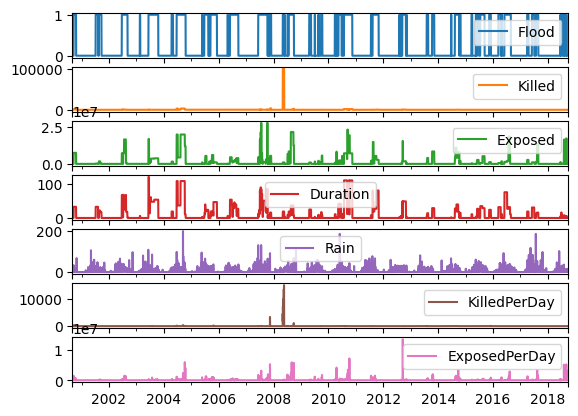

In [35]:
kpd_df.plot(subplots=True)

In [36]:
kpd_df.to_csv('kpdf.csv')

array([<Axes: xlabel='flood'>, <Axes: xlabel='flood'>,
       <Axes: xlabel='flood'>, <Axes: xlabel='flood'>,
       <Axes: xlabel='flood'>], dtype=object)

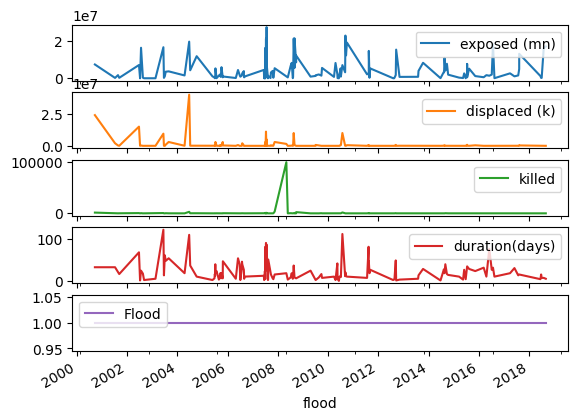

In [7]:
df.plot(subplots=True)

In [8]:
date_range = pd.date_range(start='2000-09-01', end='2018-09-30', freq='D')

# Create a new DataFrame with this date range as the index
final_df = pd.DataFrame(index=date_range)

# Initialize columns in final_df
final_df['Flood'] = 0
final_df['Killed'] = np.nan
final_df['Exposed'] = np.nan  # Initialize 'Exposed' column
final_df['Duration'] = np.nan  # Initialize 'Duration' column

# For each flood event, populate the Flood, killed, exposed, and duration during the flood's duration
for i, row in df.iterrows():
    start_date = i  # 'flood_start' is the index
    end_date = start_date + pd.Timedelta(days=row['duration(days)'] - 1)
    
    # Set Flood = 1, killed, exposed, and duration during the flood period
    final_df.loc[start_date:end_date, 'Flood'] = 1
    final_df.loc[start_date:end_date, 'Killed'] = row['killed']
    final_df.loc[start_date:end_date, 'exposed (mn)'] = row['exposed (mn)']  # Assuming 'exposed' column exists
    final_df.loc[start_date:end_date, 'Duration(days)'] = row['duration(days)']  # Assuming 'duration(days)' exists

# Fill NaN values in Killed, Exposed with 0 (for days with no flood)
final_df['Killed'].fillna(0, inplace=True)
final_df['Exposed'].fillna(0, inplace=True)
final_df['Duration'].fillna(0, inplace=True)  # Optional: If you want to fill Duration with 0, otherwise leave as NaN

# Display the final DataFrame
final_df.head()

,Flood,Killed,Exposed,Duration,exposed (mn),Duration(days)
2000-09-01,0,0.0,0.0,0.0,NaN,NaN
2000-09-02,0,0.0,0.0,0.0,NaN,NaN
2000-09-03,0,0.0,0.0,0.0,NaN,NaN
2000-09-04,0,0.0,0.0,0.0,NaN,NaN
2000-09-05,0,0.0,0.0,0.0,NaN,NaN


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

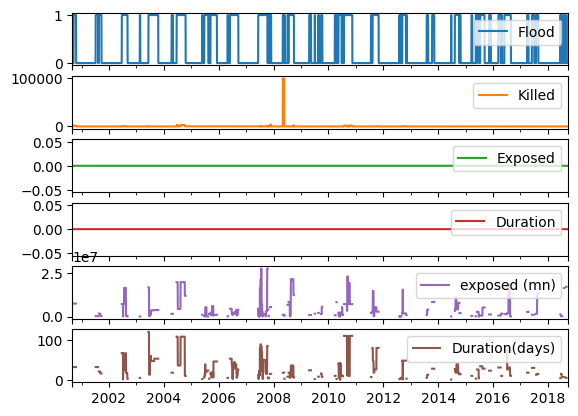

In [9]:
final_df.plot(subplots=True)

In [10]:
# Processing the hourly data to daily data

df=pd.read_csv(r'open-meteo-24.01N90.00E11m.csv')
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df = df.groupby('date')['rain (mm)'].sum().reset_index()
df.set_index(df['date'],inplace=True)
df.drop(columns=['date'],inplace=True)
df.head()

,rain (mm)
date,
2000-09-01,16.8
2000-09-02,8.7
2000-09-03,11.9
2000-09-04,7.9
2000-09-05,4.1


In [11]:
merged_df = pd.merge(final_df, df, left_index=True, right_index=True, how='left')
merged_df['rain (mm)'].fillna(0, inplace=True)
merged_df.drop(columns=['Duration','Exposed'],inplace=True)
merged_df.rename(columns={
    'rain (mm)': 'Rain', 
    'killed':'Killed',
    'exposed (mn)':'Exposed',
    'Duration(days)':'Duration'}, inplace=True)
merged_df.head()

,Flood,Killed,Exposed,Duration,Rain
2000-09-01,0,0.0,NaN,NaN,16.8
2000-09-02,0,0.0,NaN,NaN,8.7
2000-09-03,0,0.0,NaN,NaN,11.9
2000-09-04,0,0.0,NaN,NaN,7.9
2000-09-05,0,0.0,NaN,NaN,4.1


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

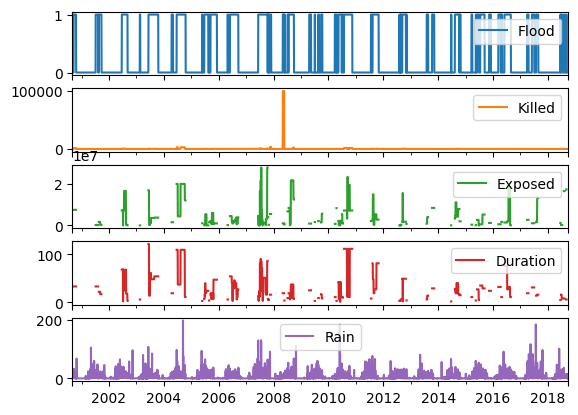

In [12]:
merged_df.plot(subplots=True)

In [13]:
df=merged_df.copy()
df.head()

,Flood,Killed,Exposed,Duration,Rain
2000-09-01,0,0.0,NaN,NaN,16.8
2000-09-02,0,0.0,NaN,NaN,8.7
2000-09-03,0,0.0,NaN,NaN,11.9
2000-09-04,0,0.0,NaN,NaN,7.9
2000-09-05,0,0.0,NaN,NaN,4.1


In [15]:
df['KilledPerDay'] = np.where(df['Flood'] > 0, np.nan, 0)
df['ExposedPerDay'] = np.where(df['Flood'] > 0, np.nan, 0)
df.head()

,Flood,Killed,Exposed,Duration,Rain,KilledPerDay,ExposedPerDay
2000-09-01,0,0.0,0.0,0.0,16.8,0.0,0.0
2000-09-02,0,0.0,0.0,0.0,8.7,0.0,0.0
2000-09-03,0,0.0,0.0,0.0,11.9,0.0,0.0
2000-09-04,0,0.0,0.0,0.0,7.9,0.0,0.0
2000-09-05,0,0.0,0.0,0.0,4.1,0.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6604 entries, 2000-09-01 to 2018-09-30
Freq: D
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Flood          6604 non-null   int64  
 1   Killed         6604 non-null   float64
 2   Exposed        6604 non-null   float64
 3   Duration       6604 non-null   float64
 4   Rain           6604 non-null   float64
 5   KilledPerDay   4743 non-null   float64
 6   ExposedPerDay  4743 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 670.8 KB


In [17]:
kpd_df = df.copy()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Step 1: Create a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()

# Step 2: Identify rows where Flood is 1 and get unique durations
floods = df_copy[df_copy['Flood'] == 1]

# Step 3: Iterate over each flood to calculate total rain for that flood's duration
for _, flood_row in floods.iterrows():
    duration = flood_row['Duration']
    
    # Determine the start and end date of the flood based on the duration
    flood_start_date = flood_row.name
    flood_end_date = flood_start_date + pd.Timedelta(days=duration - 1)
    
    # Step 4: Filter rows for this flood duration
    flood_period = df_copy.loc[flood_start_date:flood_end_date]

    # Step 5: Calculate the total Rain for this flood period
    total_rain = flood_period['Rain'].sum()

    # Step 6: Fill NaN values in KilledPerDay and ExposedPerDay
    # Using the Killed and Exposed values from the flood_row
    killed_value = flood_row['Killed']
    exposed_value = flood_row['Exposed']
    
    if total_rain > 0:
        # Fill NaN values based on the calculated total_rain
        df_copy.loc[flood_period.index, 'KilledPerDay'] = df_copy.loc[flood_period.index, 'KilledPerDay'].fillna(killed_value / total_rain)
        df_copy.loc[flood_period.index, 'ExposedPerDay'] = df_copy.loc[flood_period.index, 'ExposedPerDay'].fillna(exposed_value / total_rain)

# Display the updated DataFrame
print(df_copy)


In [ ]:
df_copy.plot(subplots=True)

In [ ]:
df['ExposedPerDay'].value_counts()

In [ ]:
df[df['Flood']==1].groupby('Duration')['Rain'].sum()

In [ ]:
df.head()